In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


In [3]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train.shape

(60000,)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [7]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)


In [8]:
Y_train.shape

(60000, 10)

In [43]:
Y_test.shape

(10000, 10)

In [37]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="ReLU"))
model.add(Dense(128, activation="ReLU"))
model.add(Dense(64, activation="ReLU"))
model.add(Dense(32, activation="ReLU"))
model.add(Dense(10, activation="softmax"))


In [41]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs,batch_size=128)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.1512 - accuracy: 0.9560 - val_loss: 0.1510 - val_accuracy: 0.9550
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1339 - accuracy: 0.9609 - val_loss: 0.1358 - val_accuracy: 0.9585
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1202 - accuracy: 0.9654 - val_loss: 0.1259 - val_accuracy: 0.9619
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1093 - accuracy: 0.9680 - val_loss: 0.1189 - val_accuracy: 0.9618
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0997 - accuracy: 0.9707 - val_loss: 0.1117 - val_accuracy: 0.9650
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0909 - accuracy: 0.9738 - val_loss: 0.1128 - val_accuracy: 0.9671
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0838 - accuracy: 0.9757 - val_loss: 0.0961 - val_accuracy: 0.9695
Epoch 

In [45]:
predictions = model.predict(X_test, batch_size=64)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



[]

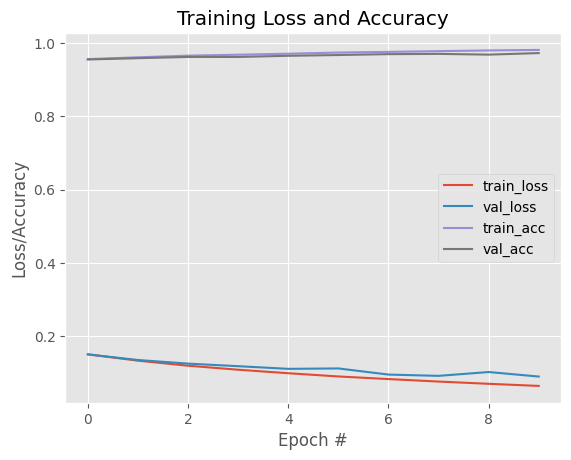

In [46]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss") 
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc") 
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.plot()